# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge on testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

Import `passengers.csv` and view the head.

In [5]:
# Read the dataset 'passengers.csv' and view the head
passengers = pd.read_csv('passengers.csv')
passengers.head(15)
# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [16]:
# Set month column as a timeseries object, and make it the index
passengers['Month'] = pd.to_datetime(passengers['Month'], format='%Y-%m-%d')
passengers.set_index('Month', inplace=True)
passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
# check the head and the new index
passengers.index

# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now that we have successfully created a TS object, we can use simple `plot()` function in pandas to visually incpect this time-series.

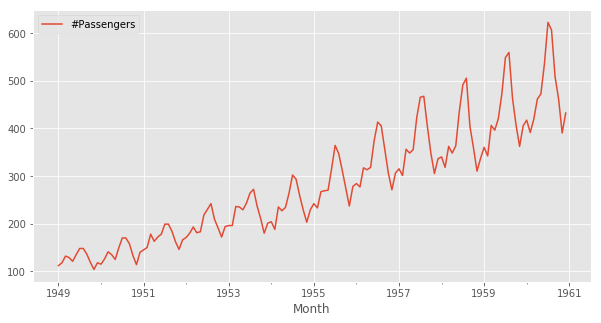

In [19]:
# Plot the time series data
passengers.plot(figsize=(10, 5))

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and 

## Rolling Statistics 

Use the `.rolling()` function to find rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [20]:
# Determine rolling statistics
pass_mean = passengers.rolling(window=12, center=False).mean()
pass_std = passengers.rolling(window=12, center=False).std()

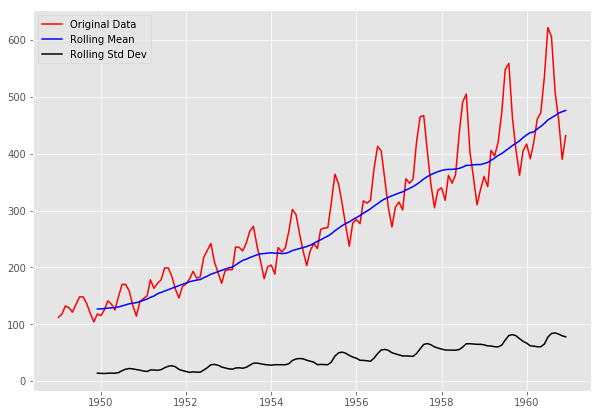

In [30]:
# Plot rolling statistics
plt.figure(figsize=(10, 7))
plt.plot(passengers, label='Original Data', color='red')
plt.plot(pass_mean, label='Rolling Mean', color='blue')
plt.plot(pass_std, label='Rolling Std Dev', color='black')
plt.legend()
# plt.show(block=False)

Though the variation in standard deviation is small, mean is clearly increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [40]:
passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [41]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
dftest = adfuller(passengers['#Passengers'])
dft
# Extract and display test results in a user friendly manner

# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

(0.8153688792060544,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [45]:
dfoutput = pd.Series(dftest[:4], index=['Test Statistic', 'P-value', '# of Lags', '# of Observations'])
for key, value in dftest[4].items():
    dfoutput[f'Critical Value {key}'] = value

print('Results of Dickey-Fuller Test:')
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic          0.815369
P-value                 0.991880
# of Lags              13.000000
# of Observations     130.000000
Critical Value 1%      -3.481682
Critical Value 5%      -2.884042
Critical Value 10%     -2.578770
dtype: float64


## Conclusion here
The null hypothesis is that the data is not stationary. Given a p-value of .99, we cannot reject the null hypothesis at the 95% confidence level, and confirm that the data is not stationary.

## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

In [48]:
nyse = pd.read_csv('NYSE_monthly.csv')
nyse.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [52]:
nyse['Month'] = pd.to_datetime(nyse.Month, format='%Y-%m')
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


In [53]:
nyse.index

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
      

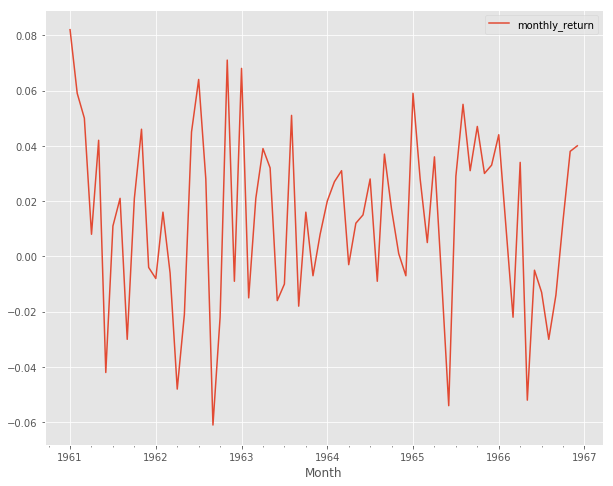

In [55]:
nyse.plot(figsize=(10, 8))

In [56]:
nyse_mean = nyse.rolling(window=12, center=False).mean()
nyse_std = nyse.rolling(window=12, center=False).std()

Text(0.5, 1.0, 'NYSE Stock Data')

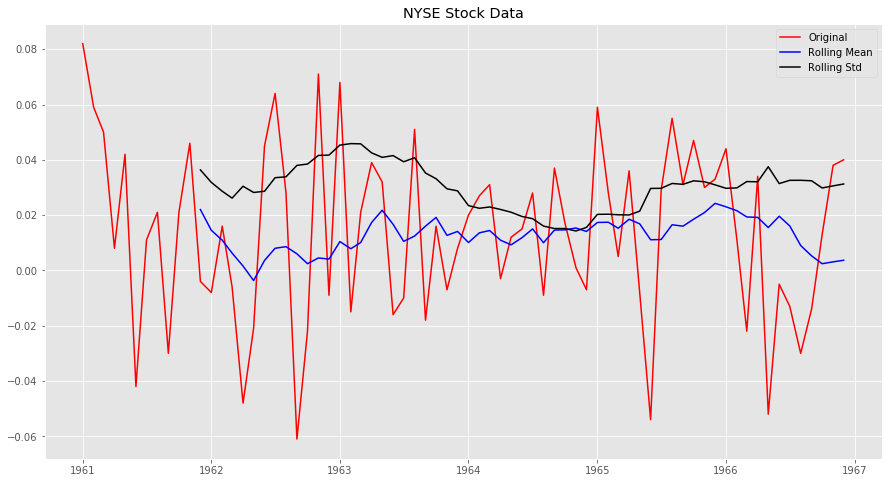

In [57]:
plt.figure(figsize=(15, 8))
plt.plot(nyse, color='r', label='Original')
plt.plot(nyse_mean, color='b', label='Rolling Mean')
plt.plot(nyse_std, color='black', label='Rolling Std')
plt.legend()
plt.title('NYSE Stock Data')

In [60]:
nyse_df = adfuller(nyse['monthly_return'])
dfoutput = pd.Series(nyse_df[:4], index=['Test Statistic', 'P-Value', '# of Lags', '# of Observations'])

for key, val in nyse_df[4].items():
    dfoutput[f'Critical Value {key}'] = val
    
print('Results of Dickey-Fuller Test:')
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic       -7.895375e+00
P-Value               4.325126e-12
# of Lags             0.000000e+00
# of Observations     7.100000e+01
Critical Value 1%    -3.526005e+00
Critical Value 5%    -2.903200e+00
Critical Value 10%   -2.588995e+00
dtype: float64


## Results
The graph shows no clear trend in mean or standard deviation. Given a p-value of less than 1% on the Dickey-Fuller test, we reject the null hypothesis at find that the data is stationary.

## Summary

In this lab, we learnt to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!